In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import linear_model as sklm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
import nltk
from nltk.corpus import names
import random
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random


housing_dat = pd.read_csv('USA_Housing.csv')
#df = pd.read_csv('mushrooms.csv')


housing_dat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
def state_search(state, address):
    
    for ele in state:
        if ele in address: 
            return ele
    return "no state"
def index_search(state, address):
    
    for ele in range(0,len(state)):
        if state[ele] in address: 
            return ele
    return 42069



In [5]:
states_and_territory = pd.read_csv('states.csv')
states_and_territory.sort_values('abrev')
#housing_dat['state'] = housing_dat[state.abrev.isin(housing_dat.Address)]
state_abrev= states_and_territory['abrev']
state_abrev= state_abrev.to_list()

housing_dat['state'] = [state_search(state_abrev,ele) for ele in  housing_dat['Address'] ]
housing_dat['index_state'] = [index_search(state_abrev,ele) for ele in  housing_dat['state'] ]

bystate= housing_dat.sort_values('index_state')
bystate= bystate[bystate.index_state != 42069]
#bystate.drop('no state',axis='columns')
#print(bystate['state'][0:20])
#print(housing_dat[housing_dat['state']=='no state'].shape)

print(bystate['state'].unique()[44])

SC


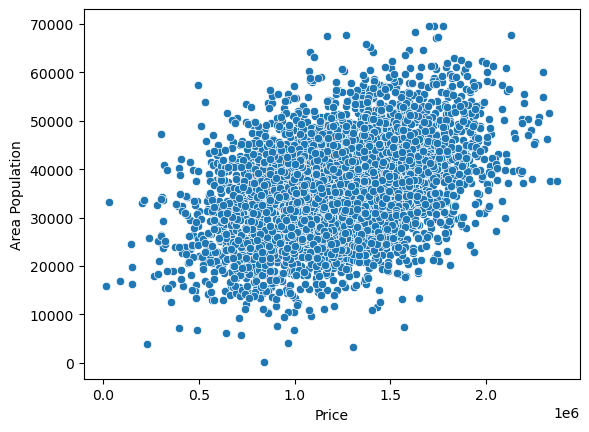

In [5]:
sns.scatterplot(data=bystate,x='Price',y='Area Population')

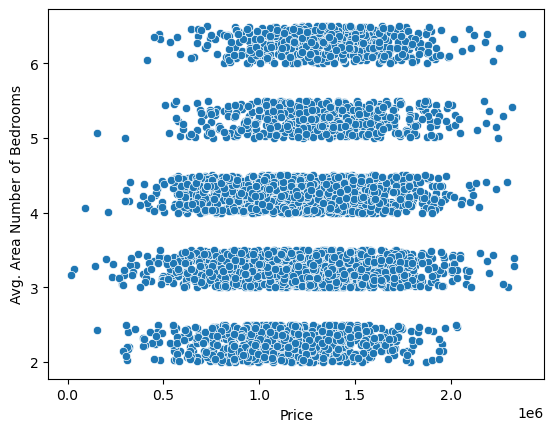

In [11]:
sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Bedrooms')

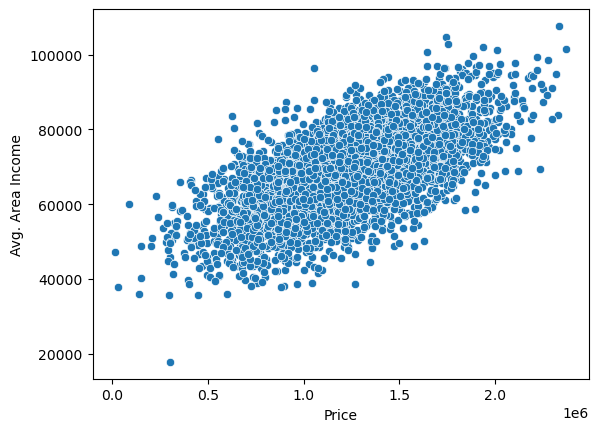

In [12]:
sns.scatterplot(data=bystate,x='Price',y='Avg. Area Income')

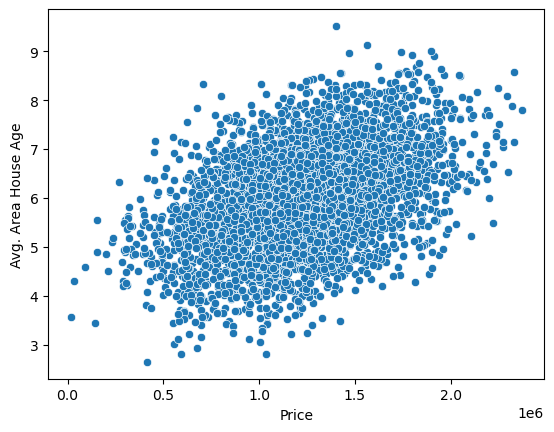

In [14]:
sns.scatterplot(data=bystate,x='Price',y='Avg. Area House Age')

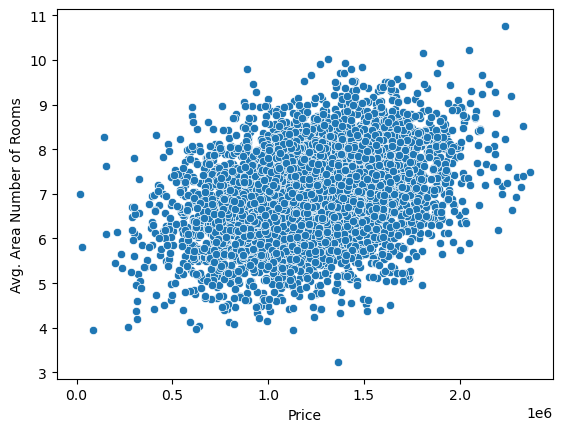

In [15]:
sns.scatterplot(data=bystate,x='Price',y='Avg. Area Number of Rooms')

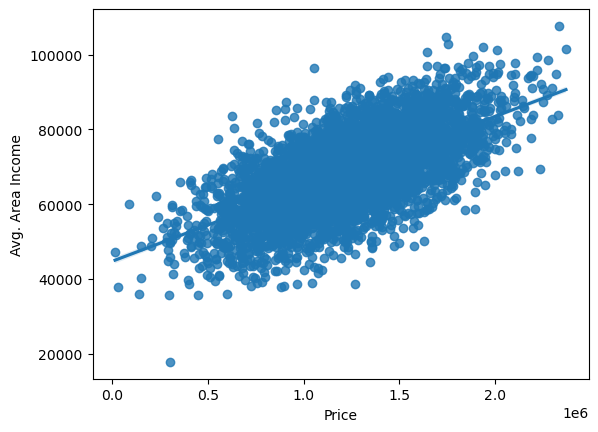

In [16]:
sns.regplot(data=bystate,x='Price',y='Avg. Area Income')

In [11]:
bystate['costal_or_not']= ( (bystate['state']=='WA') | (bystate['state']=='NY') | (bystate['state']=='CA'))
bystate['costal_or_not']= bystate['costal_or_not'].astype(int)
print(bystate.costal_or_not)

1286    0
381     0
1011    0
3572    0
2788    0
       ..
2350    0
4175    0
444     0
3470    0
2138    0
Name: costal_or_not, Length: 4527, dtype: int32


In [7]:
from sklearn.linear_model import LogisticRegression


X = bystate[[ 'Price', 'Avg. Area Income','Area Population']]
y = bystate.costal_or_not

lm = LogisticRegression()
lm.fit(X, y)

#print(lm.intercept_)
#print(lm.coef_)

LogisticRegression()

In [13]:
y_pred = lm.predict(X)

# look at what values were predicted


display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [0.00,0.00]'

C:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'precision = [0.88601723 0.        ]'

'recall = [1. 0.]'

'f-score = [0.9395643 0.       ]'

In [ ]:
# Plot the dataset colored by prediction
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.experience, df.salary, c=color, s=3)
plt.xlabel('experience')
plt.ylabel('salary')

# display(lm.intercept_)
# display(lm.coef_)

b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random
newx = []
newy = []
newlabel = []
for _ in range(5000):
# for _ in range(5000):
    px = random.uniform(-2,2)
    py = random.uniform(-2.5,2.5)
    plabel = lm.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=7)
plt.xlabel('x')
plt.ylabel('y')